# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-03-series_infinitas.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos de Series infinitas

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [ ]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Errores de máquina

¿Cuál es el número más pequeño $\varepsilon$ tal que $1+\varepsilon=1$?:

In [3]:
x=1+1e-16

print(f"{x:.20f}")

1.00000000000000000000


¿Cuántos decimales guarda `python`:

In [4]:
x=0.123456789012345678901234567890

print(f"{x:.30f}")

0.123456789012345677369886232100


Errores de reondeo:

In [6]:
N=1e12
x=1.0
y=0.1
z=(N*x+y)-(N*x)

print(f"x = {x:+.15e}")
print(f"y = {y:+.15e}")
print(f"z = {z:+.15e}")

x = +1.000000000000000e+00
y = +1.000000000000000e-01
z = +9.997558593750000e-02


### Cálculo numérico de series infinitas

Cálculo de un valor aproximado de la serie de la función seno:

In [7]:
from math import factorial
from numpy import pi

#Numero de términos de la serie
k=18
#Valor del ángulo
t=3*pi
#Suma parcial
sk=0
for n in range(k):
    sk+=(-1)**n*t**(2*n+1)/factorial(2*n+1)

from numpy import sin
print(f"s_{k}({t:g}) = {sk:.16e}")
print(f"sin({t:g}) = {sin(t):.16e}")

s_18(9.42478) = -7.6538436107548528e-08
sin(9.42478) = 3.6739403974420594e-16


El mismo cálculo pero aprovechando las propiedades de la función seno:

In [8]:
#Valor de t mapeado en el intervalo [0,2 pi)
from numpy import mod
tn=mod(t,2*pi)

#Suma parcial
sk=0
for n in range(k):
    sk+=(-1)**n*mod(tn,2*pi)**(2*n+1)/factorial(2*n+1)

from numpy import sin
print(f"s_{k}({t:g}) = {sk:.16e}")
print(f"sin({t:g}) = {sin(t):.16e}")    

s_18(9.42478) = 3.3280566951896521e-16
sin(9.42478) = 3.6739403974420594e-16


Calculo de la serie de la función $\exp(-t)$:

In [9]:
#Número de términos en la serie
k=10
#Valor de t
t=5.0
#Suma pacial de exp(-t)
sk=0
for n in range(k):
    sk+=(-1)**n*t**n/factorial(n)

from numpy import exp
print(f"s_{k}({x:g}) = {sk:.16e}")
print(f"exp({x:g}) = {exp(x):.16e}")

s_10(1) = -1.8271053791887111e+00
exp(1) = 2.7182818284590451e+00


El mismo cálculo pero usando la propiedad $\exp(-t)=1/\exp(t)$:

In [10]:
#Suma parcial de exp(t)
sk=0
for n in range(k):
    sk+=t**n/factorial(n)

from numpy import exp
print(f"1/s_{k}({t:g}) = {1/sk:.16e}")
print(f"exp({t:g}) = {exp(-t):.16e}")

1/s_10(5) = 6.9594528636495370e-03
exp(5) = 6.7379469990854670e-03


Rutina para el cálculo de serie de Taylor usando criterio de convergencia:

In [12]:
def exp_taylor(t,delta=1e-15):
    #Valor inicial del error relativo (número arbitrario)
    Dn=1
    #Primer valor de la suma parcial
    sn=0
    #Inicializa contador de términos
    n=0
    #El ciclo continúa mientras no se alcance la tolerancia
    while Dn>delta:
        #Almacena el último valor de la suma
        s=sn
        #Calcula el término n-esimo de la suma
        from math import factorial
        an=t**n/factorial(n)
        #Agrega el término a la suma n-esima
        sn+=an
        #Promedio de dos sumas parciales sucesivas
        smed=(sn+s)/2
        #Error relativo
        Dn=abs(an/smed)
        #Incremento en el contador n
        n+=1
    return sn,Dn,n

Prueba de la rutina en el caso estudiado antes:

In [13]:
t=20
x,error_x,n_x=exp_taylor(-t)
y,error_y,n_y=exp_taylor(+t)

from numpy import exp
print(f"x = exp(-{t:g}) = {x:.16e} (error {error_x:.2e}, n = {n_x})")
print(f"1/y = 1/exp(+{t:g}) = {1/y:.16e} (error {error_y:.2e}, n = {n_y})")
print(f"exp(-{t:g}) = {exp(-t):.16e}")

x = exp(-20) = 5.4781029165292094e-10 (error 7.00e-16, n = 96)
1/y = 1/exp(+20) = 2.0611536224385591e-09 (error 9.22e-16, n = 66)
exp(-20) = 2.0611536224385579e-09


### Series de Stumpff

Verificación de las reglas de recurrencias:

In [16]:
#Verifica las reglas de recurrencia
t=2
k=4

from pymcel.export import serie_stumpff
ck=serie_stumpff(t,k)
ckp2=serie_stumpff(t,k+2)

from math import factorial
print("Regla de recurrencia:")
print(f"c_{k}({t}) = {ck}")
print(f"1/{k}!-t c_{k+2}({t}) = {1/factorial(k)-t*ckp2}")

Regla de recurrencia:
c_4(2) = 0.03898592369134362
1/4!-t c_6(2) = 0.03898592369134361


Verificación de las reglas de escalado:

In [17]:
#Verifica las reglas de escalado
t=2
k=4

from pymcel.export import serie_stumpff
c0_4t=serie_stumpff(4*t,0)
c0_t=serie_stumpff(t,0)
c1_4t=serie_stumpff(4*t,1)
c1_t=serie_stumpff(t,1)
c2_4t=serie_stumpff(4*t,2)
c2_t=serie_stumpff(t,2)
c3_4t=serie_stumpff(4*t,3)
c3_t=serie_stumpff(t,3)

print(f"c_0({4*t}) = {c0_4t}, con escalado = {2*c0_t**2-1}")
print(f"c_1({4*t}) = {c1_4t}, con escalado = {c0_t*c1_t}")
print(f"c_2({4*t}) = {c2_4t}, con escalado = {0.5*c1_t**2}")
print(f"c_3({4*t}) = {c3_4t}, con escalado = {0.25*c2_t+0.25*c0_t*c3_t}")

c_0(8) = -0.9513631281258474, con escalado = -0.9513631281258474
c_1(8) = 0.10891980905843202, con escalado = 0.10891980905843208
c_2(8) = 0.24392039101573093, con escalado = 0.24392039101573093
c_3(8) = 0.111385023867696, con escalado = 0.11138502386769598


### Series de Fourier

Cálculo de los coeficientes de Fourier:

In [1]:
def coeficientes_fourier(funcion,T,k,args=()):
    #Funciones externas
    from scipy.integrate import quad
    from numpy import sin,cos

    #Parametro omega
    w=2*pi/T
    
    #Determina los coeficientes en t:
    f=lambda t:funcion(t,*args)
    As=[2*quad(f,0,T,args=args)[0]/T]
    Bs=[0]
    for n in range(1,k+1):
        f_cos_n=lambda t:funcion(t,*args)*cos(n*w*t)
        As+=[2*quad(f_cos_n,0,T)[0]/T]
        f_sin_n=lambda t:funcion(t,*args)*sin(n*w*t)
        Bs+=[2*quad(f_sin_n,0,T)[0]/T]
    
    return As,Bs

Cálculo de la serie de Fourier:

In [2]:
def serie_fourier(t,As,Bs,T,k):
    from numpy import sin,cos

    #Parametro omega
    w=2*pi/T

    #Calcula la suma
    sk=As[0]/2
    for n in range(1,k+1):
        sk+=As[n]*cos(n*w*t)+Bs[n]*sin(n*w*t)
    
    return sk

La serie de Fourier de una línea recta:

In [5]:
def f(t):
    y=t
    return y

#Dominio de aproximación
from numpy import pi
T=2*pi
#Número de coeficientes
k=30
#Coeficientes
As,Bs=coeficientes_fourier(f,T,k)

from numpy import array,set_printoptions
set_printoptions(threshold=11,precision=3,suppress=True)
print(f"As = {array(As)}")
print(f"Bs = {array(Bs)}")

As = [ 6.283  0.    -0.    ... -0.    -0.     0.   ]
Bs = [ 0.    -2.    -1.    ... -0.071 -0.069 -0.067]


Gráfico de la recta y de las distintas componentes de la expansión:

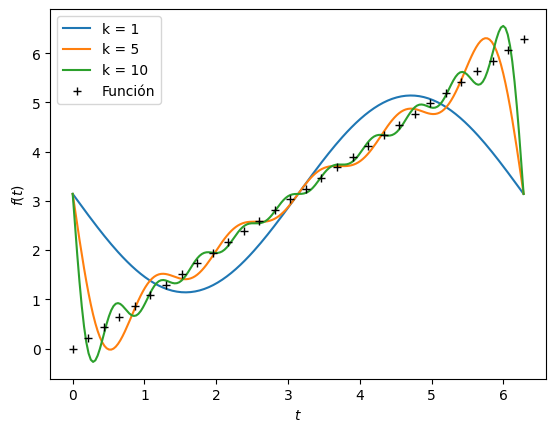

In [6]:
#Valores de la variable independiente
import matplotlib.pyplot as plt
fig=plt.figure();
ax=fig.gca();

#Aproximaciones
from numpy import linspace
ts=linspace(0,T,200)
k=1
ax.plot(ts,serie_fourier(ts,As,Bs,T,k),label=f"k = {k}");
k=5
ax.plot(ts,serie_fourier(ts,As,Bs,T,k),label=f"k = {k}");
k=10
ax.plot(ts,serie_fourier(ts,As,Bs,T,k),label=f"k = {k}");
#Gráfico de la función
ts=linspace(0,T,30)
ax.plot(ts,f(ts),'k+',label="Función");

#Decoración
ax.legend();
ax.set_xlabel("$t$");
ax.set_ylabel("$f(t)$");

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)